## Computational Challenge 9

Group \#4

Students: Alan, Chunmei, Michael, Triet

Course: Math 6397 - Stochastic Processes in Biology

Professors: Dr. Josić & Dr. Stewart

$\textbf{Challenge:}$

In this challenge you will develop different agent based models. These are representative of the
models people use in research.

It will be easiest to see what is going on if you animate your simulations. While this is optional
in the first three challenges, we suggest that you do it using, for example, FuncAnimation from matplotlib.

In this challenge you will implement a spatial version of the rock–paper–scissors game. The
agents are placed on a lattice with periodic boundary conditions, and each agent uses one of
three strategies. We can thus think of the agents as belonging to one of three species. Each
cell (location) in the lattice is either empty or occupied by an agent of one particular species.
Start with populating the lattice with agents of each type, and leaving some cells empty. The
simulation proceeds by picking a cell uniformly at random in the lattice, and then picking
a random neighboring cell. If both cells are empty, or are occupied by agents of the same
species, nothing happens. Otherwise three things can happen:

1. If only one of the cells is occupied, the agent in the occupied cell will reproduce. The descendant belongs to the same species, ie uses the same strategy.

2. If the two cells are occupied by different species, then with probability $p$ they fight. The agent with the losing strategy dies, and their cell is vacated.

3. With probability $1−p$, the agents in the two cells swap places. For this exercise it is best to animate your output. You can use FuncAnimation from matplotlib, but there are other choices. Start with a 30 by 30 grid at least.

(a) Illustrate what happens for high values of $p$, and then decrease $p$. You should see the
formation of spiral structures that increase in size as mobility is increased.

(b) Compute the time series for the frequency for each species, and plot them in time. How
does this change with $p$?

(c) Assume that there is a higher rate of reactions in the upper left quadrant of the lattice,
so that the probability of choosing a cell in this corner has probability is twice as likely
as picking a cell from another quadrant. How do the results in part (a) change?

(d) BONUS: Extend this to five species by using the rules of the rock--paper--scissors--lizzard--spock game.

In [1]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
from matplotlib.pyplot import cm
from matplotlib import colors,rc
import matplotlib.animation as animation
matplotlib.rcParams['text.usetex'] = True
import numpy as np
from scipy import integrate
import random
import ffmpeg

In [2]:
# implement 3 cases
def scenerios(C,i1,j1,i2,j2,p):
    #k = [1,2,3,1]
    x = np.random.uniform(0,1)
    if C[i1,j1]!=0 and C[i2,j2]== 0:
        C[i2,j2] = C[i1,j1]
    elif C[i1,j1]==0 and C[i2,j2]!= 0:
        C[i1, j1] = C[i2,j2]
    elif C[i1,j1]!=0 and C[i2,j2]!= 0 and C[i1,j1]!=C[i2,j2]:
        if x>p:
            # swap
            C[i2, j2] = C[i1, j1]
            C[i1, j1] = C[i2, j2]
        else:
            #fight
            if C[i1,j1]-C[i2,j2]==1 or C[i1,j1]-C[i2,j2]==-2:
                C[i2, j2] = 0
            else:
                C[i1, j1] = 0
    return C

#implement (add) periodic boundary
def add_boundary(A):
    B = np.insert(A, 0, A[-1], axis=0)
    B = np.r_[B, [A[0]]]
    B = np.insert(B, 0, B[:, -1], axis=1)
    B = np.c_[B, B[:, 1]]
    return B

#get original matrix back
def delete_boundary(B):
    A = B[1:-1,1:-1]
    return A

#implement evolution
def evolution(A,N,time_steps,p):
    B = add_boundary(A)
    M =[]
    M.append(A)
    for i in np.arange(time_steps):
        c_pos = np.random.randint(0,N+1,size=(1,2)) #current position
        nc_pos_step = np.array([np.random.randint(-1,1),np.random.randint(-1,1)])
        while np.all(nc_pos_step.all == 0):
            nc_pos_step = [np.random.randint(-1, 1), np.random.randint(-1, 1)]
        nc_pos = c_pos+nc_pos_step #neighborhood position
        B = scenerios(B,c_pos[0,0],c_pos[0,1],nc_pos[0,0],nc_pos[0,1],p)
        A = delete_boundary(B)
        B = add_boundary(A)
        M.append(A)
    return M

#implement evolution with different prob in upper left region
def evolution_leftregion(A,N,time_steps,p_seq):
    B = add_boundary(A)
    M =[]
    M.append(A)
    for i in np.arange(time_steps):
        p = p_seq[0]
        c_pos = np.random.randint(0,N+1,size=(1,2))
        if np.all(c_pos<np.int(N/2)):
            p = p_seq[1]
        nc_pos_step = [np.random.randint(-1,1),np.random.randint(-1,1)]
        while nc_pos_step == 0:
            nc_pos_step = [np.random.randint(-1, 1), np.random.randint(-1, 1)]
        nc_pos = c_pos+nc_pos_step
        B = scenerios(B,c_pos[0,0],c_pos[0,1],nc_pos[0,0],nc_pos[0,1],p)
        A = delete_boundary(B)
        B = add_boundary(A)
        M.append(A)
    return M

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


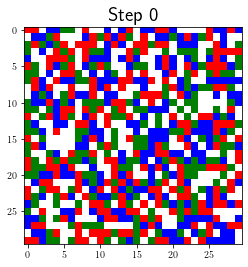

In [3]:
N=30
# Define the frequency of initial occurrence of each: empty (0), rock (1), paper (2), scissors (3)
p_empty = 0.3
p_rock = 0.24
p_paper = 0.23
p_scissors = 0.23

A = np.array(random.choices([0,1,2,3], weights=[p_empty,p_rock,p_paper,p_scissors], k=N**2)).reshape(N,N)
#A2 = np.random.randint(4, size=(N, N))
p = 0.7
time_steps = 10000
time_animation_step = 10
M =evolution(A,N,time_steps,p)

fig, ax = plt.subplots()
cmap = colors.ListedColormap(['w','r','b','g'])

im = plt.imshow(M[0],cmap=cmap)

def update(i):
    im.set_array(M[np.int(time_animation_step*i)])
    plt.title("Step %g" % (np.int(time_animation_step * i)), fontsize=20)
    return im

ani = animation.FuncAnimation(plt.gcf(), update, frames=np.int(time_steps/time_animation_step),interval=1, blit=False)

ani.save('challenge-9-a-1.gif', dpi=80, writer='imagemagick')

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


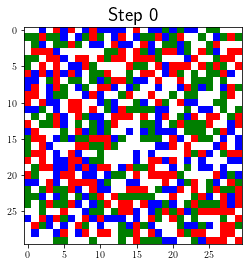

In [4]:
#changing p
N=30
# Define the frequency of initial occurrence of each: empty (0), rock (1), paper (2), scissors (3)
p_empty = 0.3
p_rock = 0.24
p_paper = 0.23
p_scissors = 0.23

A = np.array(random.choices([0,1,2,3], weights=[p_empty,p_rock,p_paper,p_scissors], k=N**2)).reshape(N,N)
#A2 = np.random.randint(4, size=(N, N))
p = 0.2
time_steps = 10000
time_animation_step = 10
M = evolution(A,N,time_steps,p)

fig, ax = plt.subplots()
cmap = colors.ListedColormap(['w','r','b','g'])

im = plt.imshow(M[0],cmap=cmap)

def update(i):
    im.set_array(M[np.int(time_animation_step*i)])
    plt.title("Step %g" % (np.int(time_animation_step * i)), fontsize=20)
    return im

ani = animation.FuncAnimation(plt.gcf(), update, frames=np.int(time_steps/time_animation_step),interval=1, blit=False)

ani.save('challenge-9-a-2.gif', dpi=80, writer='imagemagick')

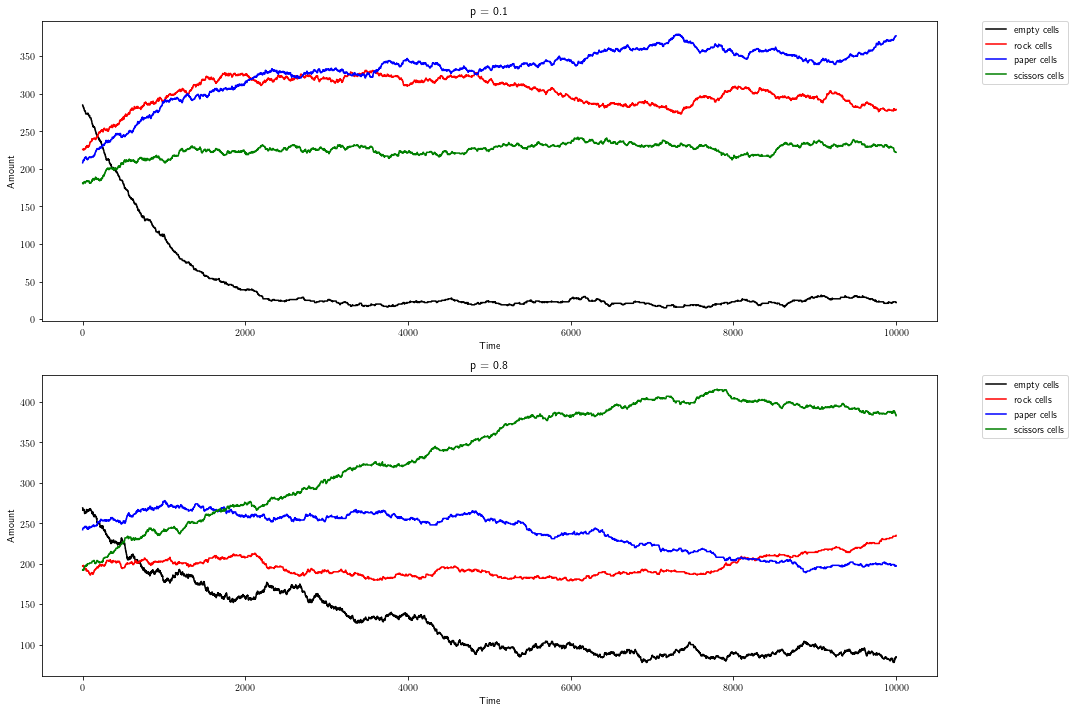

In [5]:
# plot frequency
N=30
# Define the frequency of initial occurrence of each: empty (0), rock (1), paper (2), scissors (3)
p_empty = 0.3
p_rock = 0.24
p_paper = 0.23
p_scissors = 0.23
time_steps = 10000
pk = [0.1,0.8]
fig2,ax2 = plt.subplots(len(pk),1,figsize=(15,10)) 
for k in np.arange(len(pk)):
    p = pk[k]
    A = np.array(random.choices([0,1,2,3], weights=[p_empty,p_rock,p_paper,p_scissors], k=N**2)).reshape(N,N)
    M =evolution(A,N,time_steps,p)
    freq = np.zeros((4,len(M)))
    for i in np.arange(len(M)):
        for j in np.arange(4):
            freq[j,i] = np.count_nonzero(M[i] == j)

    ax2[k].plot(np.arange(len(M)), freq[0,:],'k',label='empty cells')
    ax2[k].plot(np.arange(len(M)), freq[1,:],'r',label='rock cells')
    ax2[k].plot(np.arange(len(M)), freq[2,:],'b',label='paper cells') 
    ax2[k].plot(np.arange(len(M)), freq[3,:],'g',label='scissors cells')
    ax2[k].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    ax2[k].set_xlabel("Time") 
    ax2[k].set_ylabel("Amount") 
    ax2[k].set_title("p = %g"%p)
plt.tight_layout()
plt.show() 

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


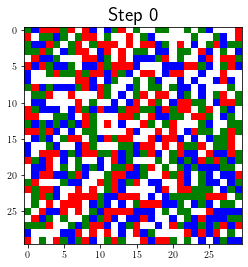

In [6]:
N=30
# Define the frequency of initial occurrence of each: empty (0), rock (1), paper (2), scissors (3)
p_empty = 0.3
p_rock = 0.24
p_paper = 0.23
p_scissors = 0.23

A = np.array(random.choices([0,1,2,3], weights=[p_empty,p_rock,p_paper,p_scissors], k=N**2)).reshape(N,N)
#A2 = np.random.randint(4, size=(N, N))
p_seq = [0.1,0.9]
# p_seq = [other_regions, upper_left]
time_steps = 10000
time_animation_step = 10
M = evolution_leftregion(A,N,time_steps,p_seq)

fig, ax = plt.subplots()
# ax.set_xlim(0, N-1)
# ax.set_ylim(0, N-1)
cmap = colors.ListedColormap(['w','r','b','g'])

im = plt.imshow(M[0],cmap=cmap)

def update(i):
    im.set_array(M[np.int(time_animation_step*i)])
    plt.title("Step %g" % (np.int(time_animation_step * i)), fontsize=20)
    return im

ani = animation.FuncAnimation(plt.gcf(), update, frames=np.int(time_steps/time_animation_step),interval=1, blit=False)

ani.save('challenge-9-c.gif', dpi=80, writer='imagemagick')